# Teste Qui-Quadrado de Independência no Dataset Titanic

**Autor:** Jesse Fernandes  
**Data:** 2025-09-29

## 1. Objetivo do Estudo

Investigar se existe uma associação estatisticamente significativa entre a classe socioeconômica do passageiro e sua sobrevivência no desastre do Titanic.

## 2. Fonte & Licença

Dataset *Titanic* (disponível via Seaborn). Licença: Domínio Público.

## 3. Dicionário de Dados

- `Pclass`: Classe do passageiro (1ª, 2ª, 3ª).
- `Survived`: Sobrevivente (0 = Não, 1 = Sim).

## 4. Metodologia

Carregamento do dataset Titanic. Criação de uma tabela de contingência entre `Pclass` e `Survived`. Aplicação do teste Qui-quadrado de independência. Análise de resíduos padronizados para identificar as células que mais contribuem para a associação.

## 5. Análise e Resultados

Primeiras 5 linhas do dataset para análise:
   pclass  survived
0       3         0
1       1         1
2       3         1
3       1         1
4       3         0

Tabela de Contingência (Classe vs. Sobrevivência):
           Não Sobreviveu  Sobreviveu
1ª Classe              80         136
2ª Classe              97          87
3ª Classe             372         119

Resultado do Teste Qui-Quadrado:
Estatística Qui-Quadrado: 102.889
p-valor: 0.000
Graus de Liberdade (dof): 2
Frequências Esperadas:
           Não Sobreviveu  Sobreviveu
1ª Classe      133.090909   82.909091
2ª Classe      113.373737   70.626263
3ª Classe      302.535354  188.464646
Com p-valor (0.000) < 0.05, rejeitamos a hipótese nula. Há uma associação significativa entre a classe e a sobrevivência.

Resíduos Padronizados:
           Não Sobreviveu  Sobreviveu
1ª Classe       -4.601993    5.830678
2ª Classe       -1.537771    1.948340
3ª Classe        3.993703   -5.059981


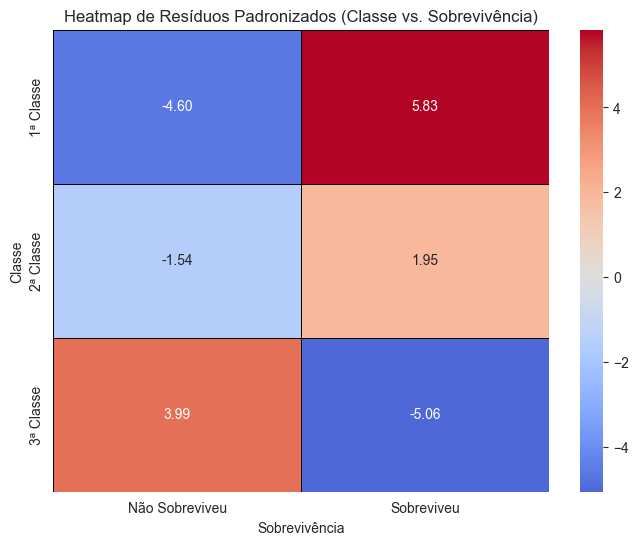

In [2]:
# Imports iniciais
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# Configurações de visualização
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 7)
np.random.seed(42) # Para reprodutibilidade

# 5.1. Carregar e Preparar os Dados
# O dataset Titanic está disponível diretamente no Seaborn
df_titanic = sns.load_dataset('titanic')

# Selecionar variáveis de interesse e remover valores ausentes para simplificar
df_analysis = df_titanic[['pclass', 'survived']].dropna()

print("Primeiras 5 linhas do dataset para análise:")
print(df_analysis.head())

# 5.2. Criação da Tabela de Contingência
contingency_table = pd.crosstab(df_analysis['pclass'], df_analysis['survived'])
contingency_table.columns = ['Não Sobreviveu', 'Sobreviveu']
contingency_table.index = ['1ª Classe', '2ª Classe', '3ª Classe']

print("\nTabela de Contingência (Classe vs. Sobrevivência):")
print(contingency_table)

# 5.3. Aplicação do Teste Qui-Quadrado de Independência
chi2, p_value, dof, expected_freq = stats.chi2_contingency(contingency_table)

print(f"\nResultado do Teste Qui-Quadrado:")
print(f"Estatística Qui-Quadrado: {chi2:.3f}")
print(f"p-valor: {p_value:.3f}")
print(f"Graus de Liberdade (dof): {dof}")
print("Frequências Esperadas:")
print(pd.DataFrame(expected_freq, columns=contingency_table.columns, index=contingency_table.index))

alpha = 0.05
if p_value < alpha:
    print(f"Com p-valor ({p_value:.3f}) < {alpha}, rejeitamos a hipótese nula. Há uma associação significativa entre a classe e a sobrevivência.")
else:
    print(f"Com p-valor ({p_value:.3f}) >= {alpha}, não rejeitamos a hipótese nula. Não há associação significativa entre a classe e a sobrevivência.")

# 5.4. Análise de Resíduos Padronizados
# Resíduos padronizados ajudam a identificar quais células contribuem mais para a associação.
# Resíduos > 2 ou < -2 são geralmente considerados significativos.
standardized_residuals = (contingency_table - expected_freq) / np.sqrt(expected_freq)
print("\nResíduos Padronizados:")
print(standardized_residuals)

plt.figure(figsize=(8, 6))
sns.heatmap(standardized_residuals, annot=True, fmt=".2f", cmap='coolwarm', center=0,
            linewidths=.5, linecolor='black')
plt.title('Heatmap de Resíduos Padronizados (Classe vs. Sobrevivência)')
plt.xlabel('Sobrevivência')
plt.ylabel('Classe')
plt.show()

## 6. Interpretação

- **Tabela de Contingência**: Mostra a frequência observada de cada combinação de classe e status de sobrevivência.
- **Teste Qui-Quadrado**: O p-valor do teste Qui-Quadrado de independência indica se a associação observada entre as variáveis é estatisticamente significativa. Um p-valor baixo (tipicamente < 0.05) sugere que as variáveis não são independentes, ou seja, há uma associação entre elas.
- **Frequências Esperadas**: Representam as frequências que seriam esperadas em cada célula da tabela se não houvesse associação entre as variáveis.
- **Resíduos Padronizados**: São cruciais para entender *onde* a associação ocorre. Valores de resíduos padronizados maiores que 2 ou menores que -2 (em valor absoluto) indicam que a frequência observada naquela célula é significativamente maior ou menor do que a esperada sob a hipótese de independência. Por exemplo, um resíduo positivo alto para '1ª Classe' e 'Sobreviveu' indicaria que passageiros da 1ª classe sobreviveram mais do que o esperado, enquanto um resíduo negativo alto para '3ª Classe' e 'Sobreviveu' indicaria que passageiros da 3ª classe sobreviveram menos do que o esperado.

## 7. Limitações

- O teste Qui-Quadrado assume que as observações são independentes e que as frequências esperadas não são muito baixas (geralmente > 5 em pelo menos 80% das células). Violações podem invalidar os resultados.
- A análise é baseada em dados históricos e pode não generalizar para outros contextos.
- A causalidade não pode ser inferida apenas pela associação; o teste indica apenas uma relação estatística.

## 8. Reprodutibilidade

- **Semente Aleatória**: `np.random.seed(42)` foi utilizada para garantir a reprodutibilidade de quaisquer processos aleatórios.
- **Versões das Bibliotecas**: As versões das bibliotecas utilizadas podem ser verificadas executando `pip freeze` no ambiente do projeto.

**Autor:** Jesse Fernandes

**Data:** 2025-09-29